In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier

In [2]:
file_path='C://Users//benar//OneDrive//Desktop//Machine Learning//datasets//Loan Prediction Problem//'
file_name='train.csv'

In [3]:
df=pd.read_csv(file_path+file_name)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(614, 13)

# Data Cleaning

## Handling Missing Values

In [10]:
def func_to_clean(data):
    data=data.drop(columns=['Loan_ID'])
    data['Credit_History']=data['Credit_History'].astype('object')
    data_num=data.select_dtypes(include=['int64','float64'])
    data_cat=data.select_dtypes('object')
    data_num=data_num.apply(lambda x:x.fillna(x.median()))
    data_cat=data_cat.apply(lambda x:x.fillna(x.mode()[0]))
    func_to_outlier(data_num)
    res=func_to_cap(data_num)
    data_cat = data_cat.apply(lambda x: x.str.strip() if x.dtype=='object' else x)
    data_cat = data_cat.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

    func_to_outlier(res)
    fin_df=pd.concat([res,data_cat],axis=1)
    fin_df.drop_duplicates(inplace=True)
    return fin_df
    

In [11]:
def func_to_outlier(data_num):
    for i in list(data_num.columns):
        sns.boxplot(data=data_num,y=i)
        plt.show()


    

In [12]:
def func_to_cap(data_num):
    for i in list(data_num.columns):
        q1=data_num[i].quantile(0.01)
        q3=data_num[i].quantile(0.99)
        iqr=q3-q1
        lc=q1-1.5*iqr
        uc=q3+1.5*iqr
        data_num[i]=data_num[i].clip(lower=lc,upper=uc)
    return data_num
    

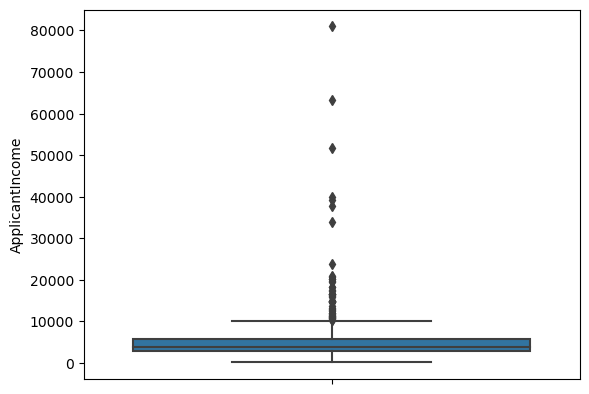

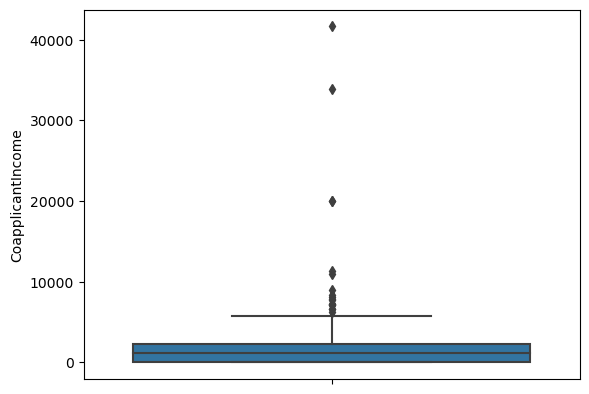

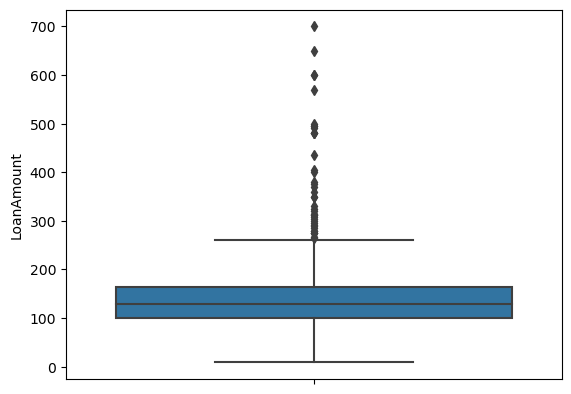

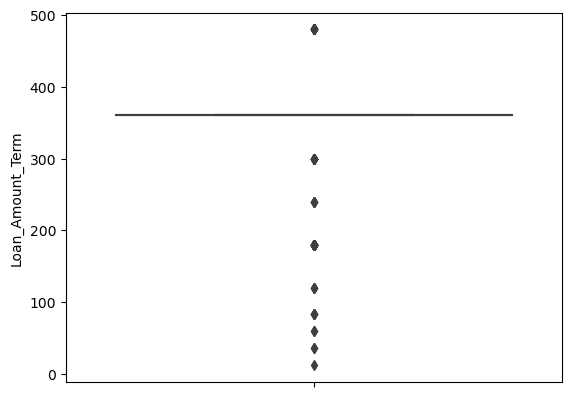

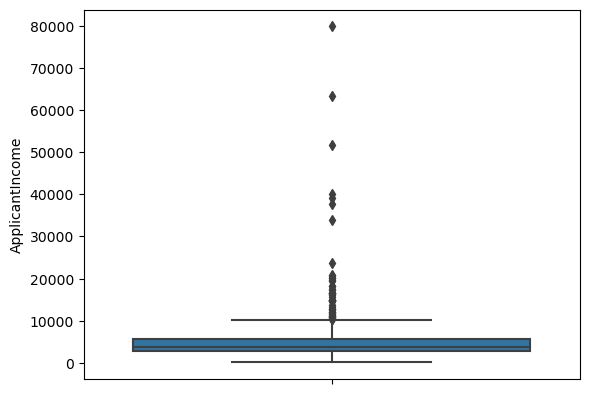

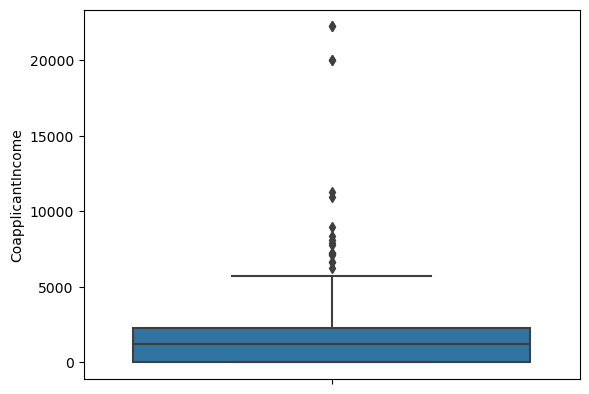

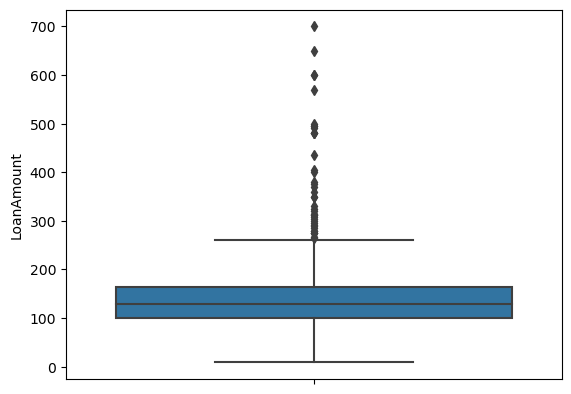

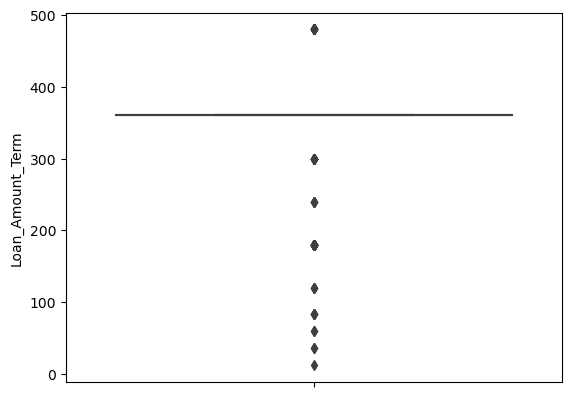

In [13]:
fin_df=func_to_clean(df)

In [14]:
fin_df.drop_duplicates(inplace=True)

In [15]:
fin_df.duplicated().sum()

0

# data visualisation

In [16]:
fin_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,male,no,0,graduate,no,1.0,urban,y
1,4583.0,1508.0,128.0,360.0,male,yes,1,graduate,no,1.0,rural,n
2,3000.0,0.0,66.0,360.0,male,yes,0,graduate,yes,1.0,urban,y
3,2583.0,2358.0,120.0,360.0,male,yes,0,not graduate,no,1.0,urban,y
4,6000.0,0.0,141.0,360.0,male,no,0,graduate,no,1.0,urban,y


In [17]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Gender             614 non-null    object 
 5   Married            614 non-null    object 
 6   Dependents         614 non-null    object 
 7   Education          614 non-null    object 
 8   Self_Employed      614 non-null    object 
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


### count of gender

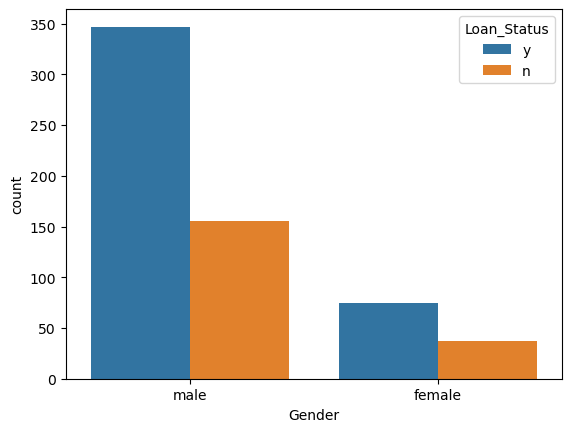

In [18]:
sns.countplot(data=fin_df,x='Gender',hue='Loan_Status')
plt.show()

# comparing to total male and female each have almost same chance of getting loan,
# cannot make much conclusion from this feature

### Dependents plot

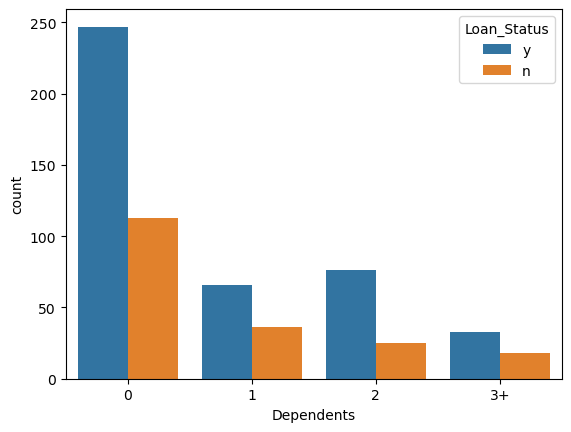

In [19]:
sns.countplot(data=fin_df,x='Dependents',hue='Loan_Status')
plt.show()

#if you have not dependents then there is high chance of getting loan

### loan amount visualisation

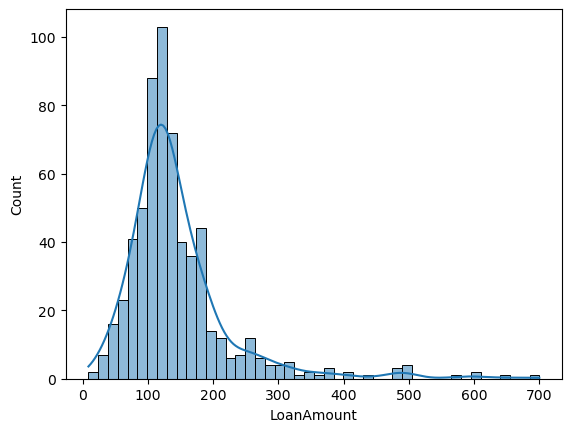

In [20]:
sns.histplot(data=fin_df,x='LoanAmount',kde=True)
plt.show()

#the loan amount data is normally distributed to an extent

### Married status plot

<Axes: xlabel='Married', ylabel='count'>

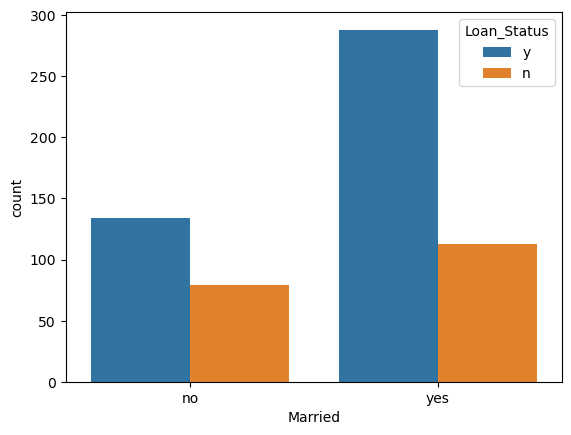

In [21]:
sns.countplot(data=fin_df,x='Married',hue='Loan_Status')

#if you are married there is high chance of getting loan

### Education plot

<Axes: xlabel='Education', ylabel='count'>

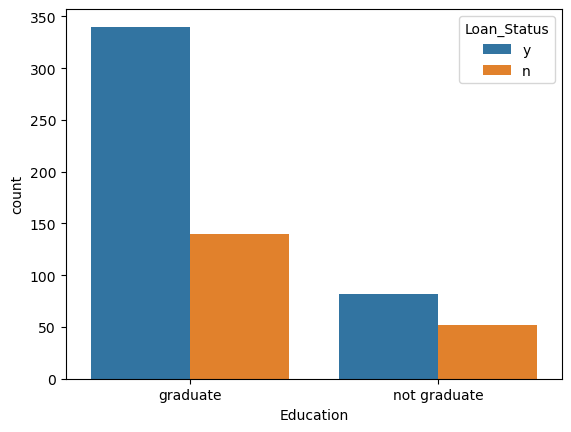

In [22]:
sns.countplot(data=fin_df,x='Education',hue='Loan_Status')

# if you are graducated there will be high probability of getting loan 
# but the proportion of Y is also same for not graduate people comparing to total not graduate people

# Property Area Analysis

In [23]:
area_cnt=fin_df['Property_Area'].value_counts()
area_cnt

Property_Area
semiurban    233
urban        202
rural        179
Name: count, dtype: int64

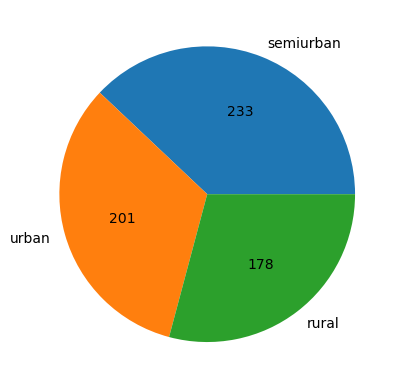

In [24]:
plt.pie(area_cnt,labels=area_cnt.index,autopct=lambda p: f'{int(p * sum(area_cnt) / 100)}')
plt.show()

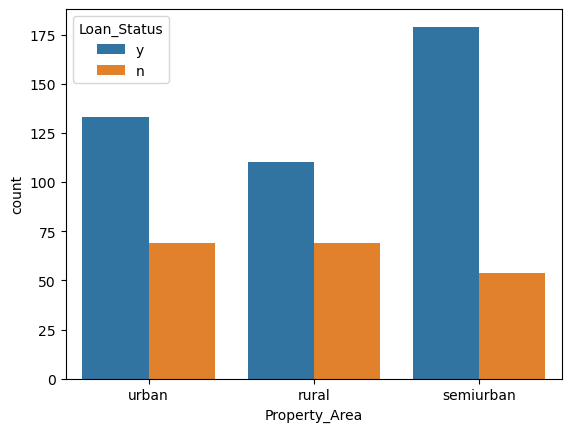

In [25]:
sns.countplot(data=fin_df,x='Property_Area',hue='Loan_Status')
plt.show()

# we can see that most people from semi urban area got loan so if you are from semi urban 
# area you probability of getting loan is more

# Self Employed plot vs loan status

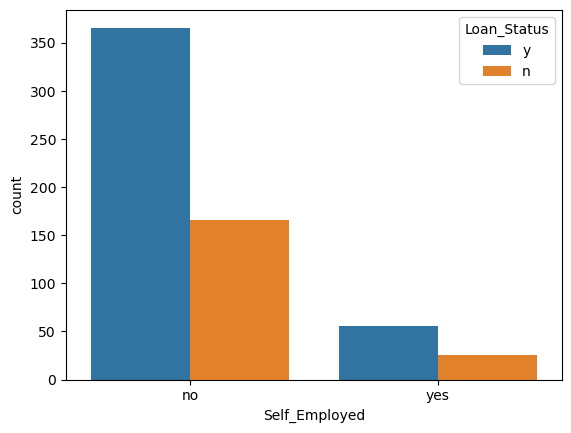

In [26]:
sns.countplot(data=fin_df,x='Self_Employed',hue='Loan_Status')
plt.show()

# cannot find much important information from this feature

# Credit History vs Loan Status

<Axes: xlabel='Credit_History', ylabel='count'>

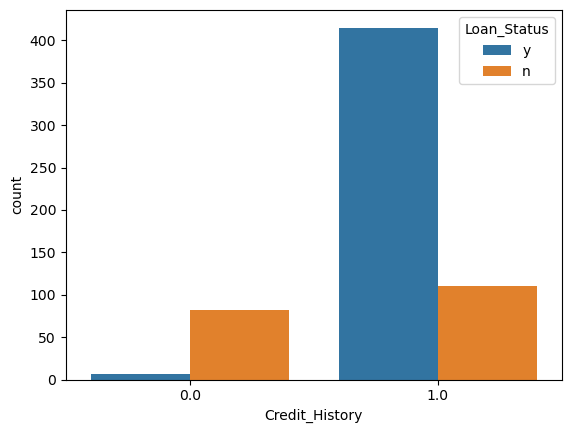

In [27]:
sns.countplot(data=fin_df,x='Credit_History',hue='Loan_Status')

# if your credit history is 1 then you are having high chance of getting loan

# splitting data to train and test

In [28]:
y=fin_df['Loan_Status']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(fin_df,y,random_state=42,test_size=0.2)
y_train=y_train.map({'y':1,'n':0})
y_test=y_test.map({'y':1,'n':0})

# Data Preprocessing

In [30]:
def preprocess(data):
    # numerical and categorical dfs
    data=data.drop_duplicates()
    num_df = data.select_dtypes(include=['float64','int64'])
    cat_df = data.select_dtypes(include=['object'])
    
    # column names
    num_cols = num_df.columns
    cat_cols = cat_df.columns
    
    # scaling numerical variables
    scaler = StandardScaler().fit(x_train[num_cols])
    scaled_nums = scaler.transform(data[num_cols])
    scaled_df = pd.DataFrame(scaled_nums, columns=num_cols, index=data.index)
    
    # one-hot encoding categorical variables
    encoded_df = pd.get_dummies(cat_df, drop_first=True)
    
    # combine numeric + categorical
    data_final = pd.concat([scaled_df, encoded_df], axis=1)
    
    # convert boolean columns to int
    bool_cols = data_final.select_dtypes(include='bool').columns
    data_final[bool_cols] = data_final[bool_cols].astype(np.int32)
    
    return data_final

    

In [31]:
res_xtrain=preprocess(x_train)
res_xtest=preprocess(x_test)

In [32]:
res_xtrain=res_xtrain.drop(columns=['Loan_Status_y'])
res_xtest=res_xtest.drop(columns=['Loan_Status_y'])

In [33]:
res_xtrain.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_male', 'Married_yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_not graduate', 'Self_Employed_yes',
       'Property_Area_semiurban', 'Property_Area_urban'],
      dtype='object')

# Creating a model

In [34]:
log_model=LogisticRegression(class_weight='balanced').fit(res_xtrain,y_train)

In [35]:
model_pred=log_model.predict(res_xtest)

In [36]:
log_model.score(res_xtest,y_test)

0.7479674796747967

In [38]:
recall_score(model_pred,y_test)

0.7752808988764045

In [39]:
f1_score(model_pred,y_test)

0.8165680473372781

In [40]:
accuracy_score(model_pred,y_test)

0.7479674796747967

In [41]:
confusion_matrix(log_model.predict(res_xtest),y_test)

array([[23, 11],
       [20, 69]], dtype=int64)

## decision tree regressor

In [42]:
DecisionTreeClassifier?

In [43]:
fin_df['Loan_Status'].value_counts()

Loan_Status
y    422
n    192
Name: count, dtype: int64

In [44]:
dec_model=DecisionTreeClassifier(max_depth=6,random_state=42,class_weight='balanced').fit(res_xtrain,y_train)

In [45]:
dec_model.tree_.max_depth

6

In [46]:
accuracy_score(dec_model.predict(res_xtest),y_test)

0.6829268292682927

## random forest classifier

In [47]:
ran_model=RandomForestClassifier(n_estimators=400,class_weight='balanced').fit(res_xtrain,y_train)

In [48]:
accuracy_score(ran_model.predict(res_xtest),y_test)

0.7804878048780488

In [49]:
confusion_matrix(ran_model.predict(res_xtest),y_test)

array([[18,  2],
       [25, 78]], dtype=int64)

## gradient boost classifer

In [50]:
grad_model=GradientBoostingClassifier().fit(res_xtrain,y_train)


In [51]:
accuracy_score(grad_model.predict(res_xtest),y_test)

0.7804878048780488

In [52]:
confusion_matrix(grad_model.predict(res_xtest),y_test)

array([[18,  2],
       [25, 78]], dtype=int64)

# xgboost 

In [69]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/b8/90/f082b89dd74da8ca27f8a3c7b3e38fc8529a4a14eb2c5b0937c7d66aa922/xgboost-3.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 108.9 kB/s eta 0:11:01
   ---------------------------------------- 0.0/72.0 MB 108.9 kB/s eta 0:11:01
   ---------------------------------------- 0.0/72.0 MB 108.9 kB/s eta 0:11:01
   ---------------------------------------- 0.0/72.0 MB 108.9 kB/s eta 0:11:01
   ---------------------------------------- 0.0/72.0 MB 108.9 kB/s eta 0:11:01
   ---------------------------------------- 0.0/72.0 MB 108.9 kB/s eta 0:11:01
   ---------------------------------------- 0.0/72.0 MB 108.9 kB/s eta 0:11:01
   -----------------------------

In [71]:
from xgboost import XGBClassifier
model = XGBClassifier().fit(res_xtrain,y_train)


In [73]:
mdl_pred=model.score(res_xtest,y_test)
mdl_pred

0.7479674796747967

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_distributor_init', '_loss', 'base', 'clone', 'config_context', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'externals', 'get_config', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'neighbors', 'os', 'preprocessing', 'random', 'set_config', 'setup_module', 'show_versions', 'svm', 'sys', 'tree', 'utils']


# Testing the model using test dataset

In [53]:
file_name='test.csv'

In [54]:
df_test=pd.read_csv(file_path+file_name)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


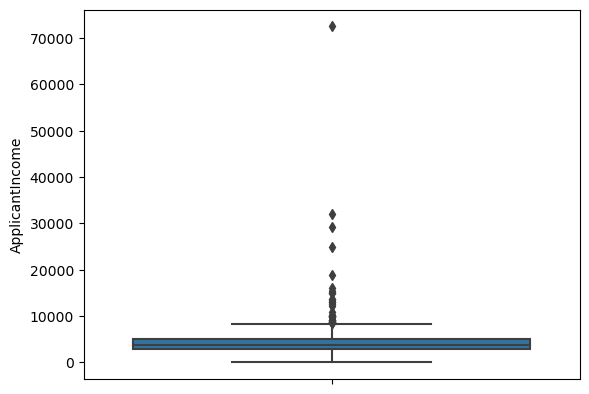

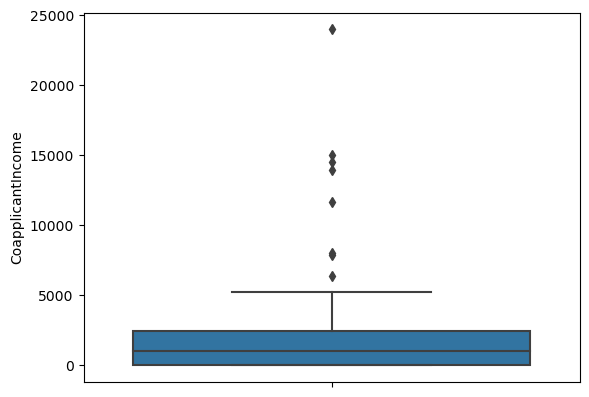

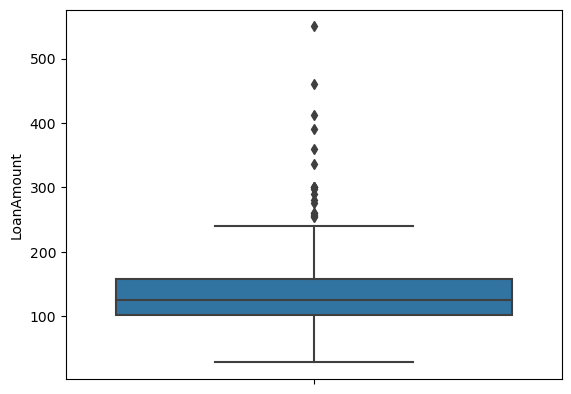

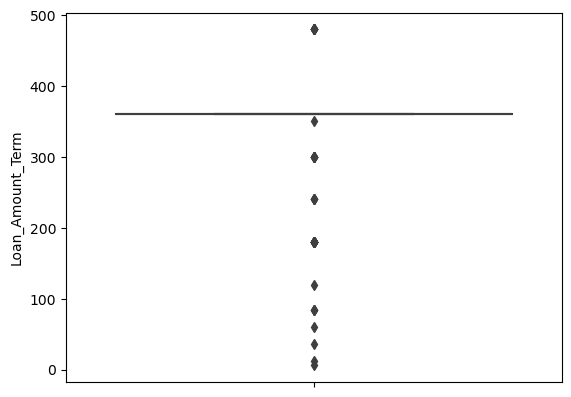

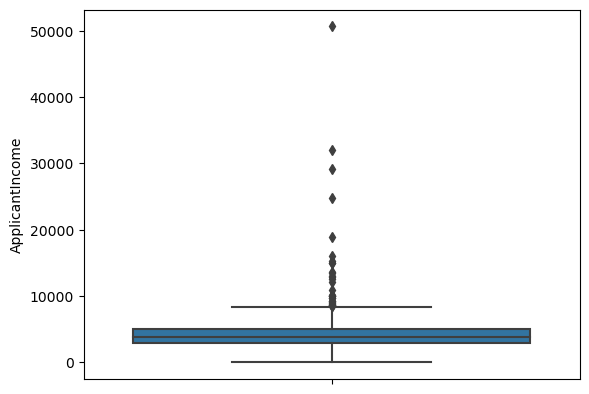

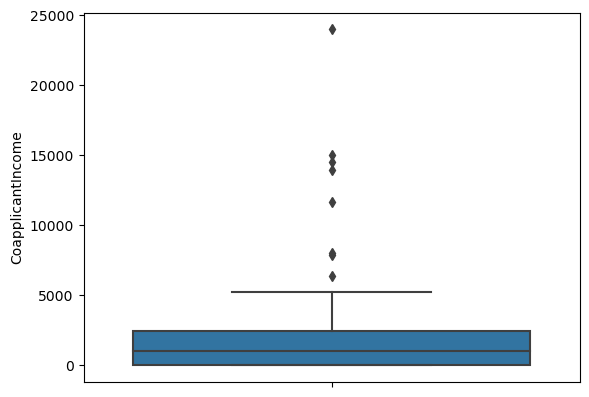

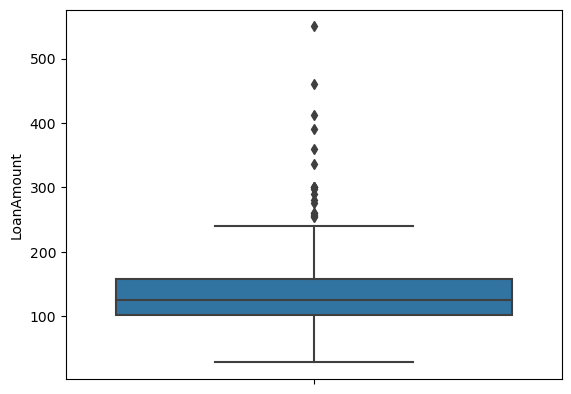

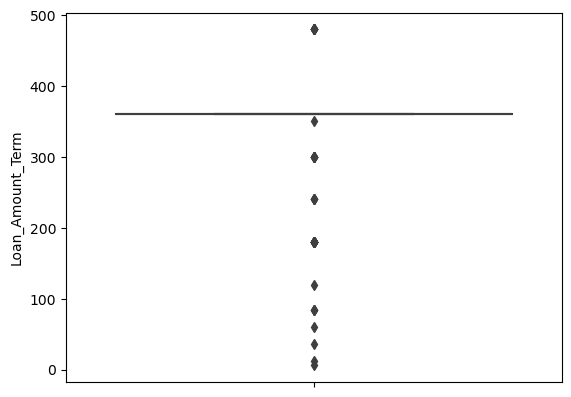

In [56]:
res=func_to_clean(df_test)

In [57]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    366 non-null    float64
 1   CoapplicantIncome  366 non-null    int64  
 2   LoanAmount         366 non-null    float64
 3   Loan_Amount_Term   366 non-null    float64
 4   Gender             366 non-null    object 
 5   Married            366 non-null    object 
 6   Dependents         366 non-null    object 
 7   Education          366 non-null    object 
 8   Self_Employed      366 non-null    object 
 9   Credit_History     366 non-null    float64
 10  Property_Area      366 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 34.3+ KB


In [58]:
final_df_test=preprocess(res)

In [59]:
log_model.predict(final_df_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,